# GSE67835 Notebook?

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata

In [2]:
def readfiles():
    w_dir = '../d/GSE67835_RAW/'
    cell_list = []
    for file in os.listdir(w_dir):
        cell_list.append(pd.read_csv(w_dir+file,sep='\t',index_col=0,header=None))
    all_count_data = pd.concat(cell_list,axis=1)
    return all_count_data

In [3]:
raw_count = readfiles()

In [4]:
raw_count

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
A1BG,0,0,0,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,0,0,185,0,0,0,0,0,139,0,...,0,7,0,0,0,8,0,243,271,0
tAKR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_feature,1259975,1257424,2251897,2245424,1520374,2932768,841301,1127769,1450507,1648681,...,844002,791301,671769,569219,1948475,1899465,1216681,1896601,3087813,1563311


In [5]:
# obviously, last 3 rows should be deleted from this count matrix
raw_count = raw_count.iloc[:-3,:]
raw_count

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
A1BG,0,0,0,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,234,324,173,25,16,91,9,18,101,1,...,0,0,17,0,0,276,32,66,0,0
ZYX,0,0,10,3,16,4,7,127,0,0,...,0,6,0,0,0,0,0,13,20,1
ZZEF1,2,105,11,0,146,0,37,0,0,0,...,428,0,7,9,0,2,20,0,0,31


In [6]:
adata = sc.AnnData(X=raw_count.T)
adata

/tmp/ipykernel_6939/4041340514.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=raw_count.T)
/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 466 × 22085

In [7]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=150, color_map='viridis')
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.2.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dask                        2023.1.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
google                      NA
h5py                        3.7.0
igraph                      0.10.3
ipykernel                   6.19.2
ipython_genutils            0.2.0
jedi                        0.18.1
jinja2                      3.1.2
joblib                      1.2.0
jupyter_server              1.23.4
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite                    0.39.1
l

In [8]:
sc.pp.filter_cells(adata, min_genes=400)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata

filtered out 3946 genes that are detected in less than 5 cells


/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 466 × 18139
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

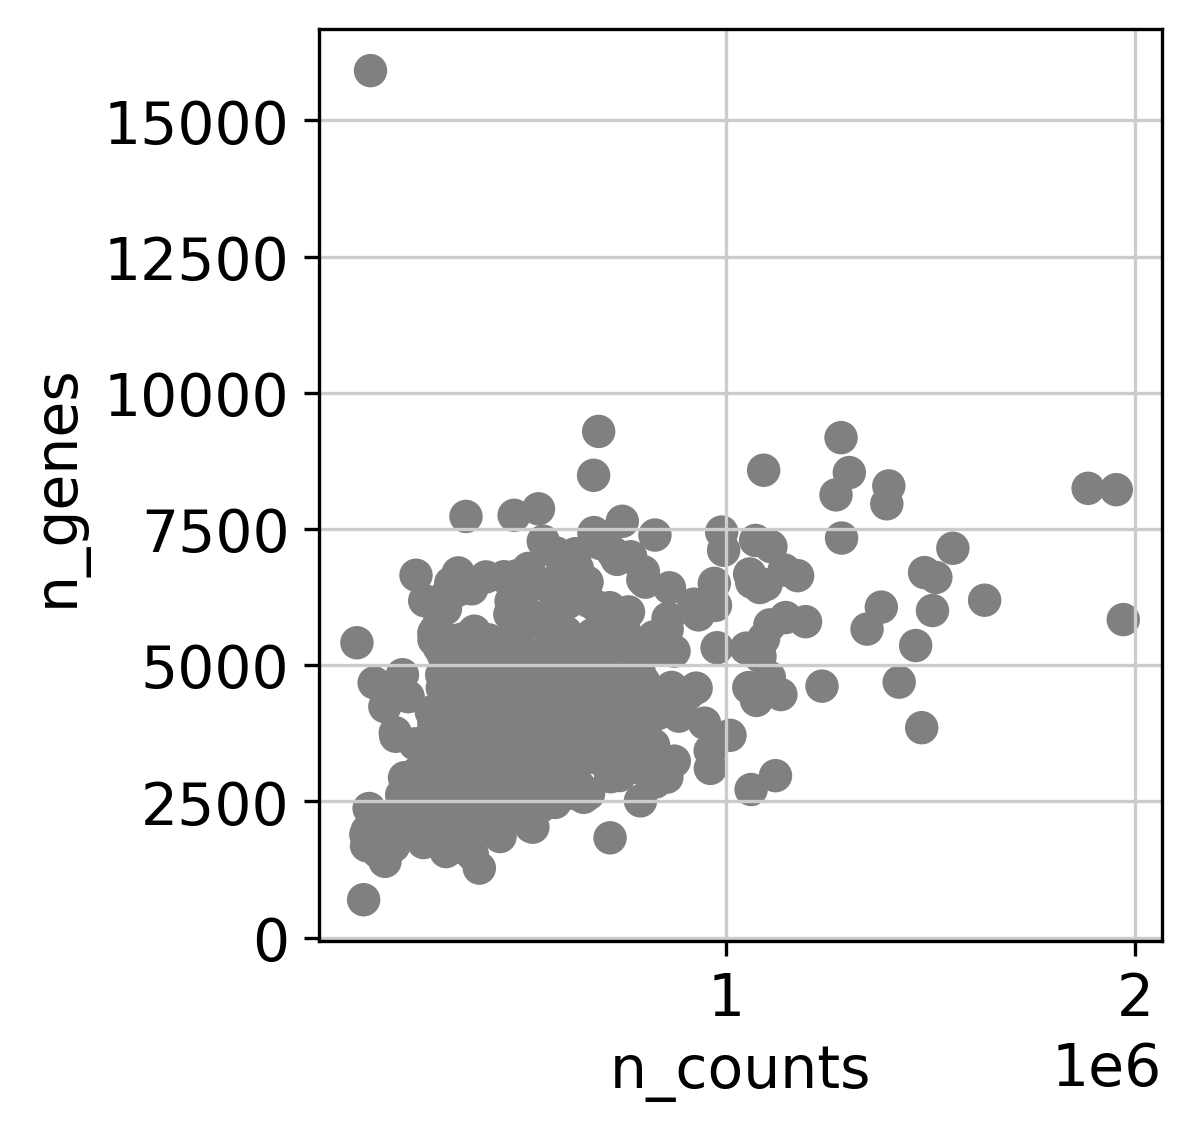

In [9]:
sc.pl.scatter(adata, x="n_counts", y='n_genes')

In [10]:
adata = adata[adata.obs['n_genes'] < 12500, :]
#adata = adata[adata.obs['n_counts'] < 4500, :]
adata.raw = sc.pp.log1p(adata, copy=True)
adata

/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 465 × 18139
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

In [11]:
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [12]:
df = pd.DataFrame(adata.X)
df.columns = adata.var.index
df.to_csv("../imp/GSE67835_norm_counts_all.txt", sep="\t")

extracting highly variable genes
    finished (0:00:00)


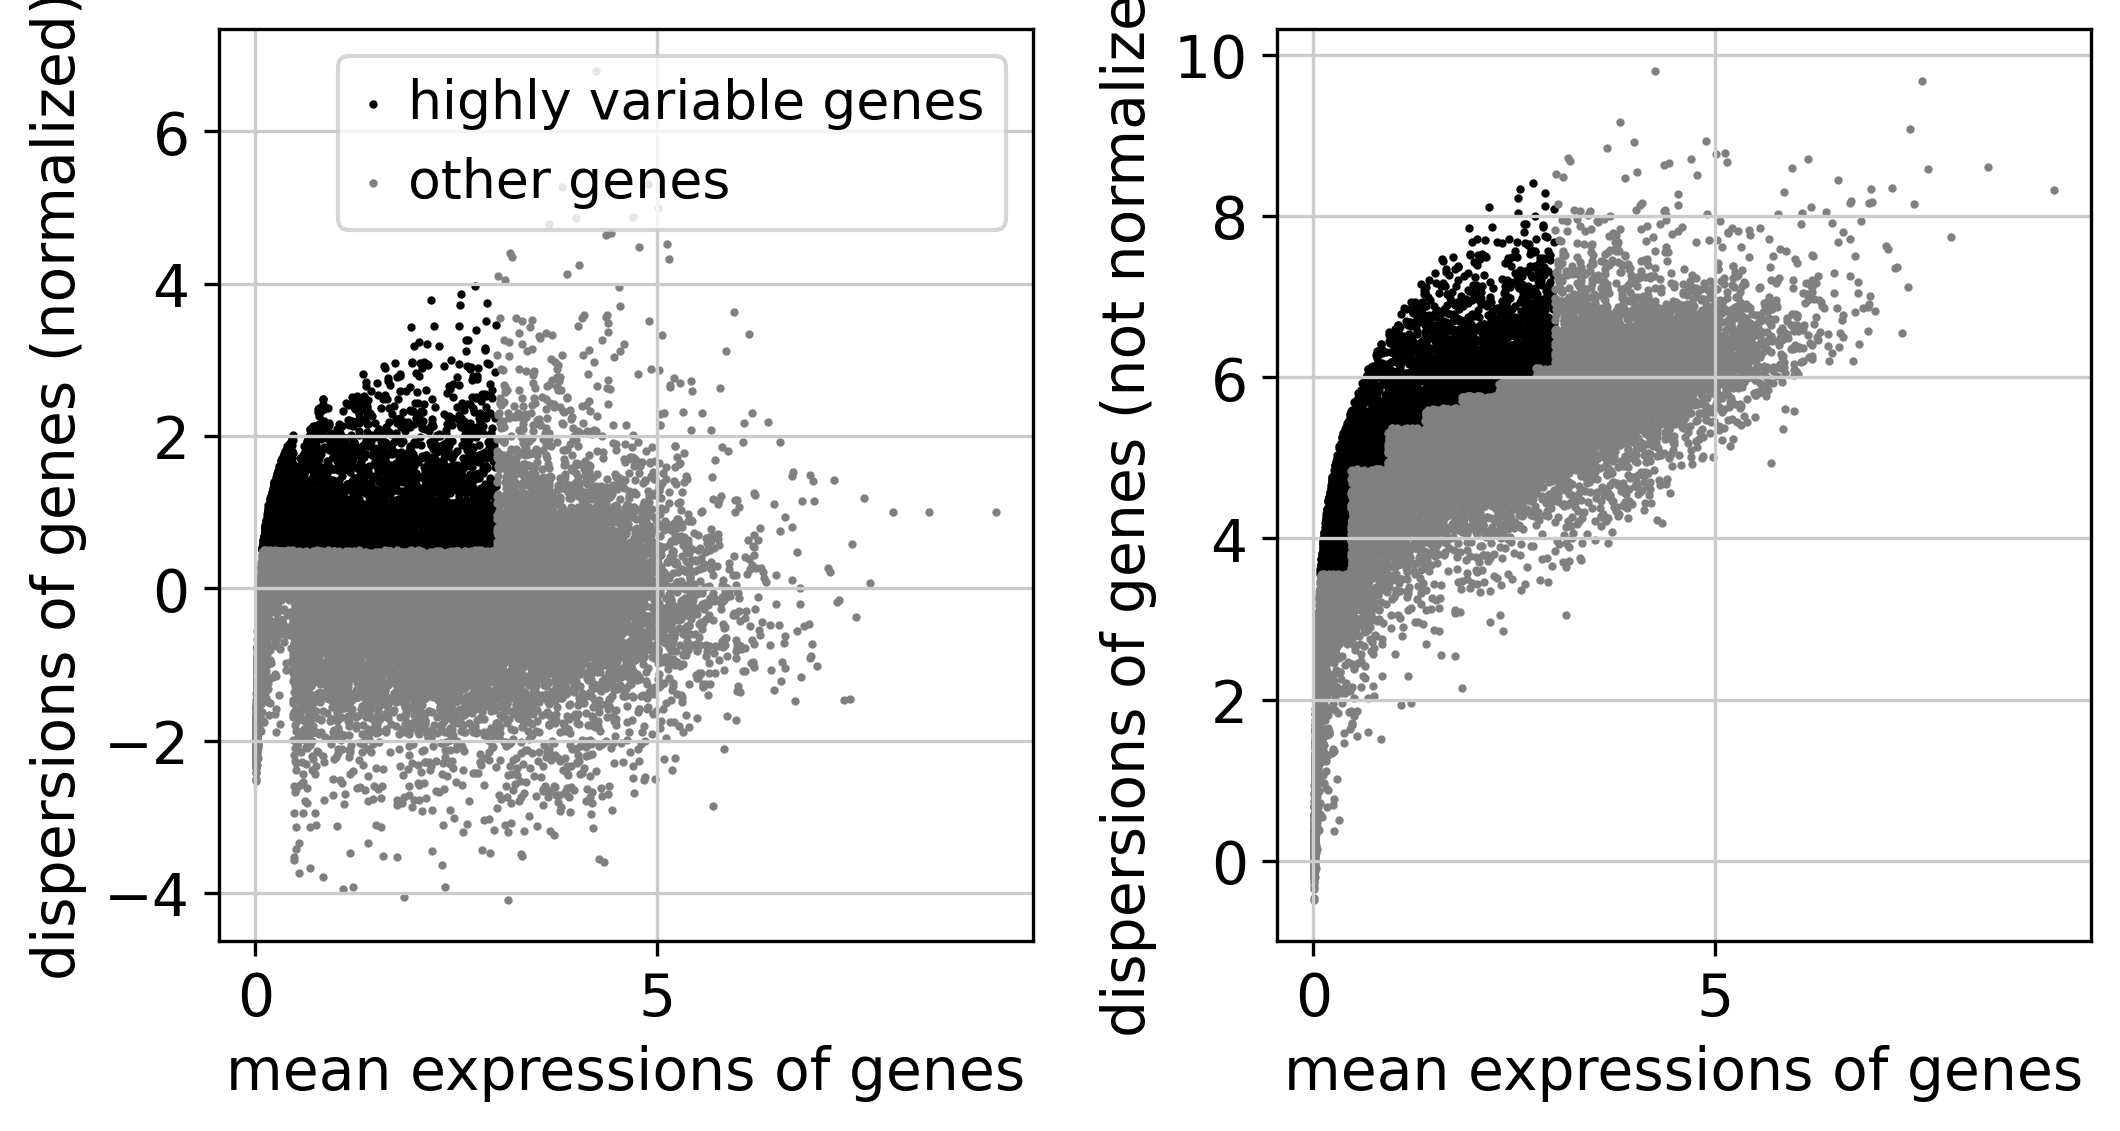

In [13]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [14]:
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']


/opt/conda/envs/celsius/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell
/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:09)


In [15]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:01)


2023-03-08 17:06:09.662654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 17:06:09.860511: E tensorflow/tsl/lib/monitoring/collection_registry.cc:81] Cannot register 2 metrics with the same name: /tensorflow/core/bfc_allocator_delay
2023-03-08 17:06:10.724559: W tensorflow/tsl/platform/default/dso_loader.cc:67] Could not load dynamic library 'libnvinfer.so.8'; dlerror: libnvinfer.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/targets/x86_64-linux/lib:/opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/usr/local/lib:/usr/lib:/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:/usr/local/cuda/ext

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


In [16]:
sc.tl.leiden(adata, resolution=1.5)

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/opt/conda/envs/celsius/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


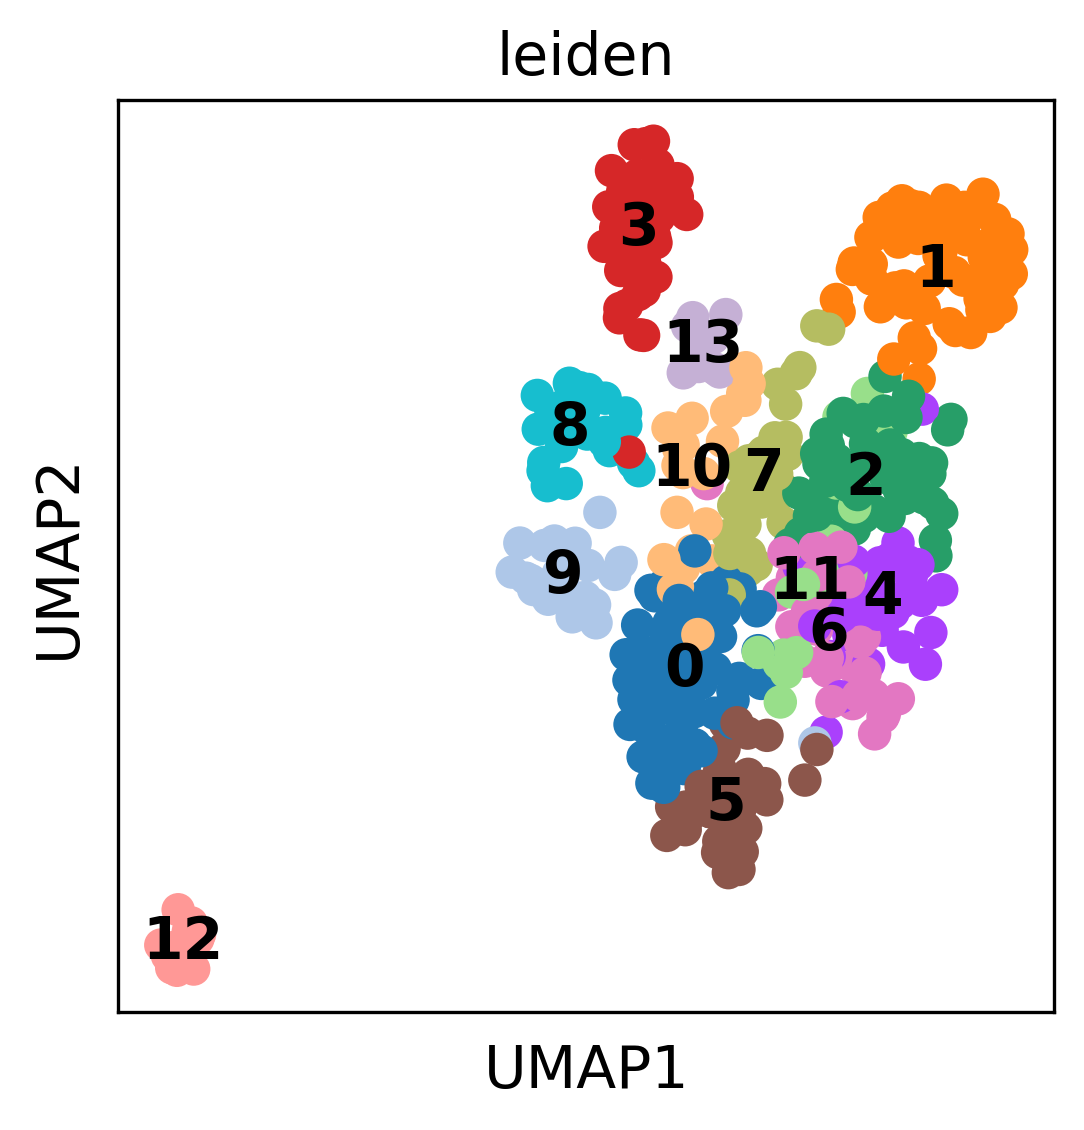

In [17]:
sc.pl.umap(adata, color='leiden', legend_loc='on data')

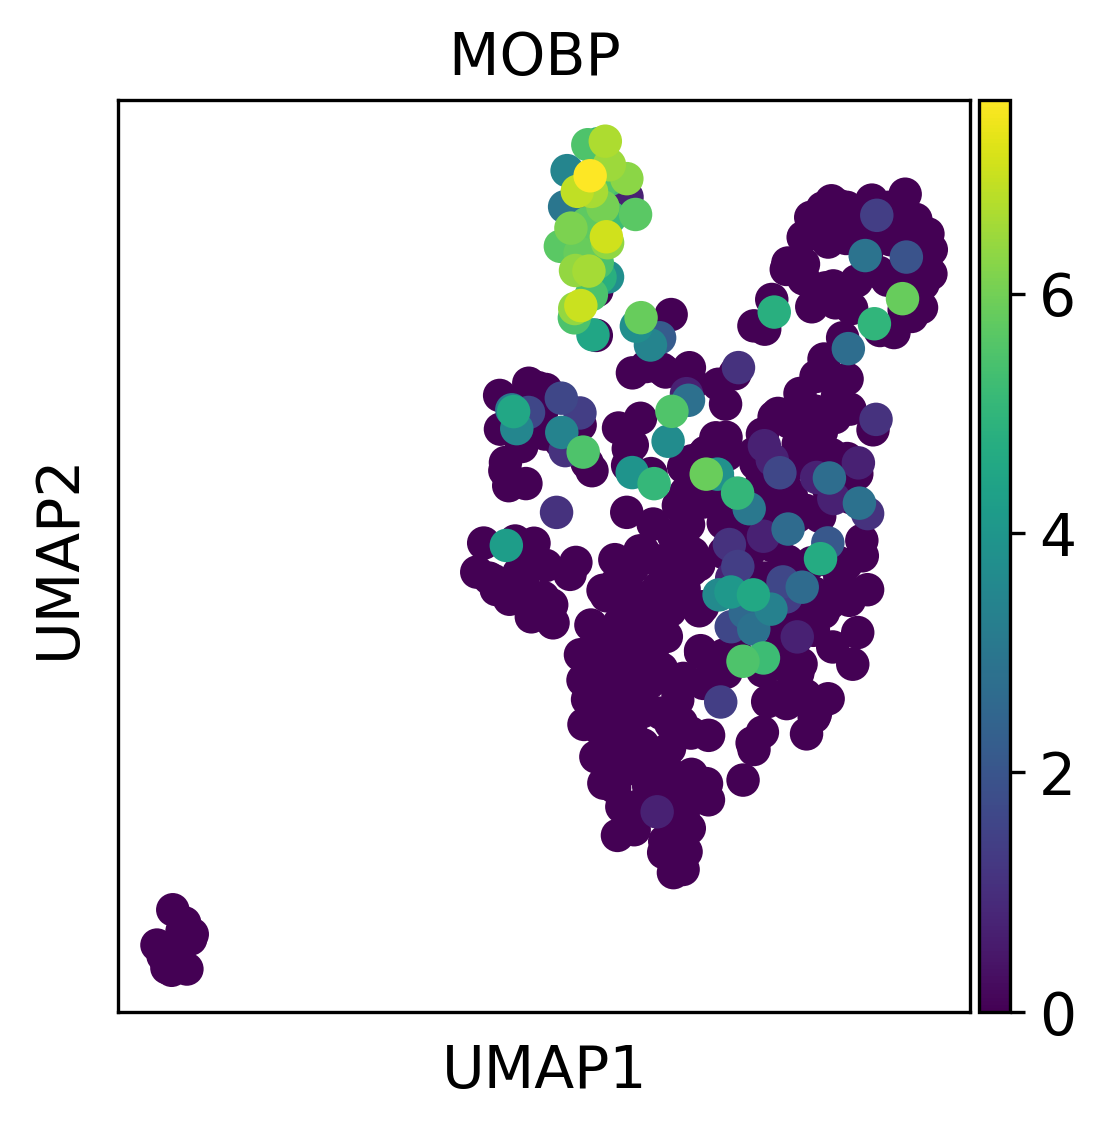

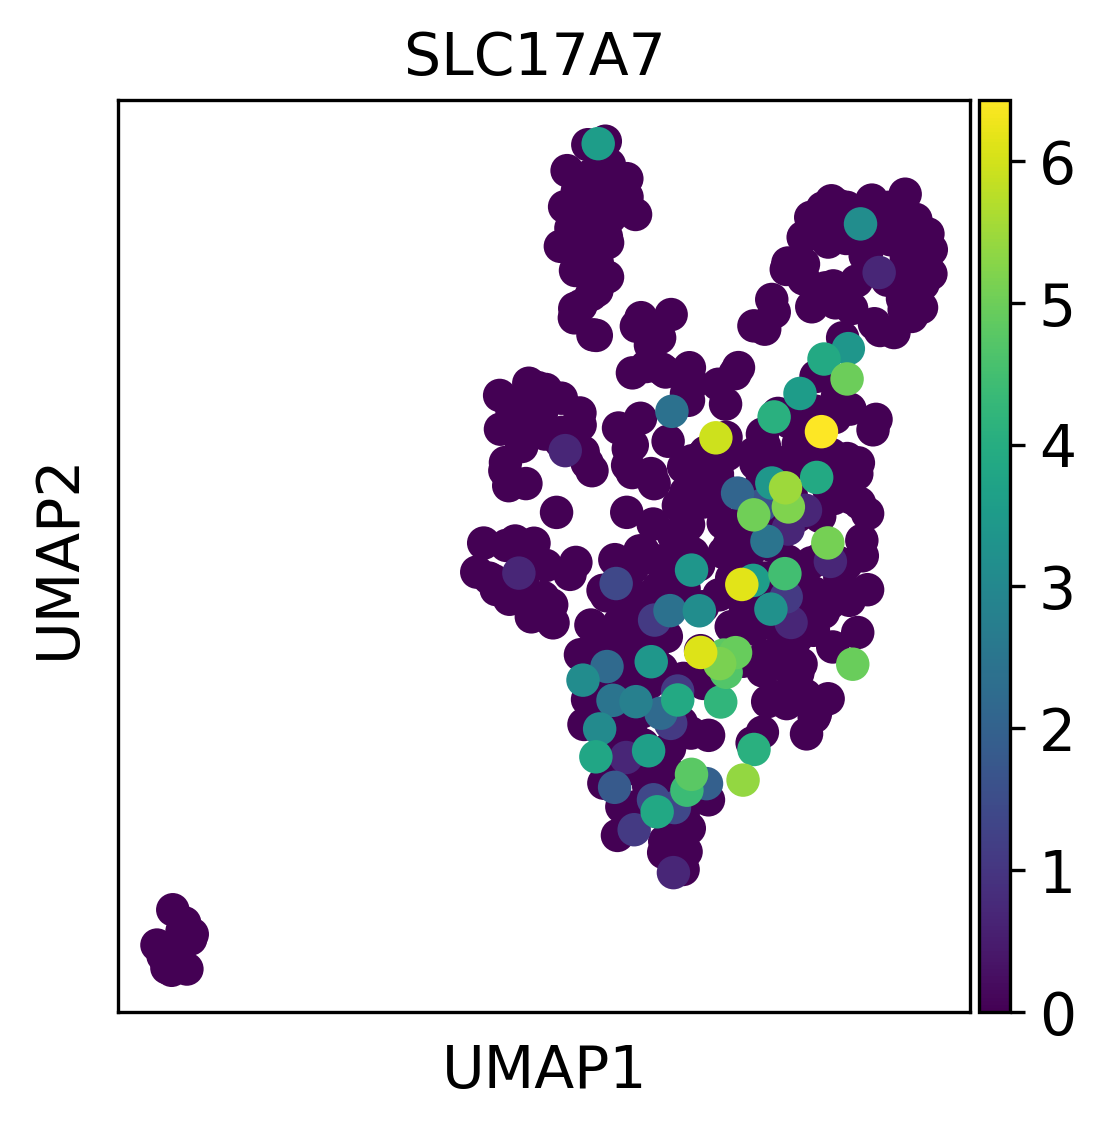

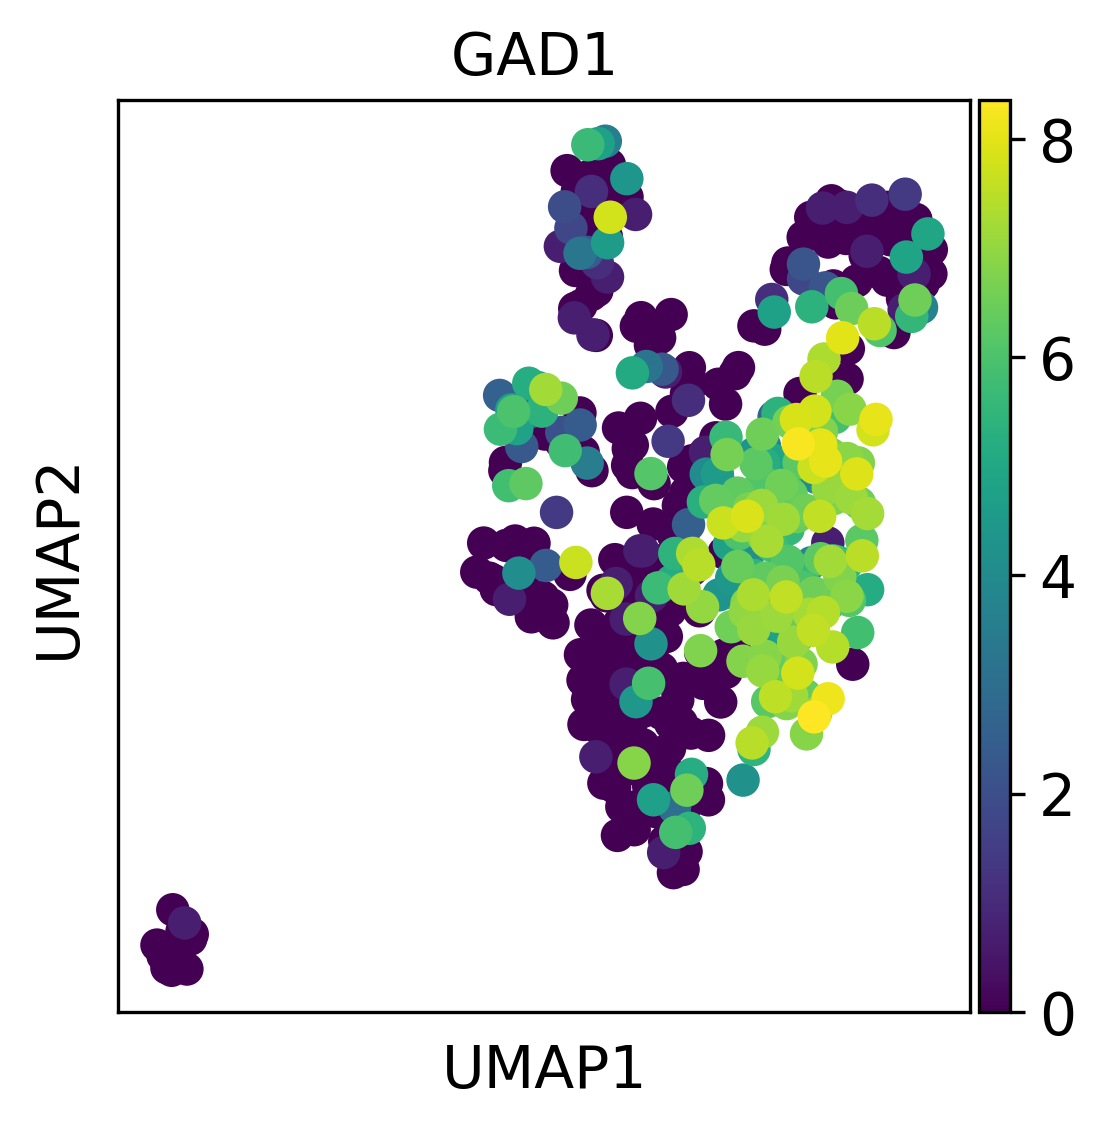

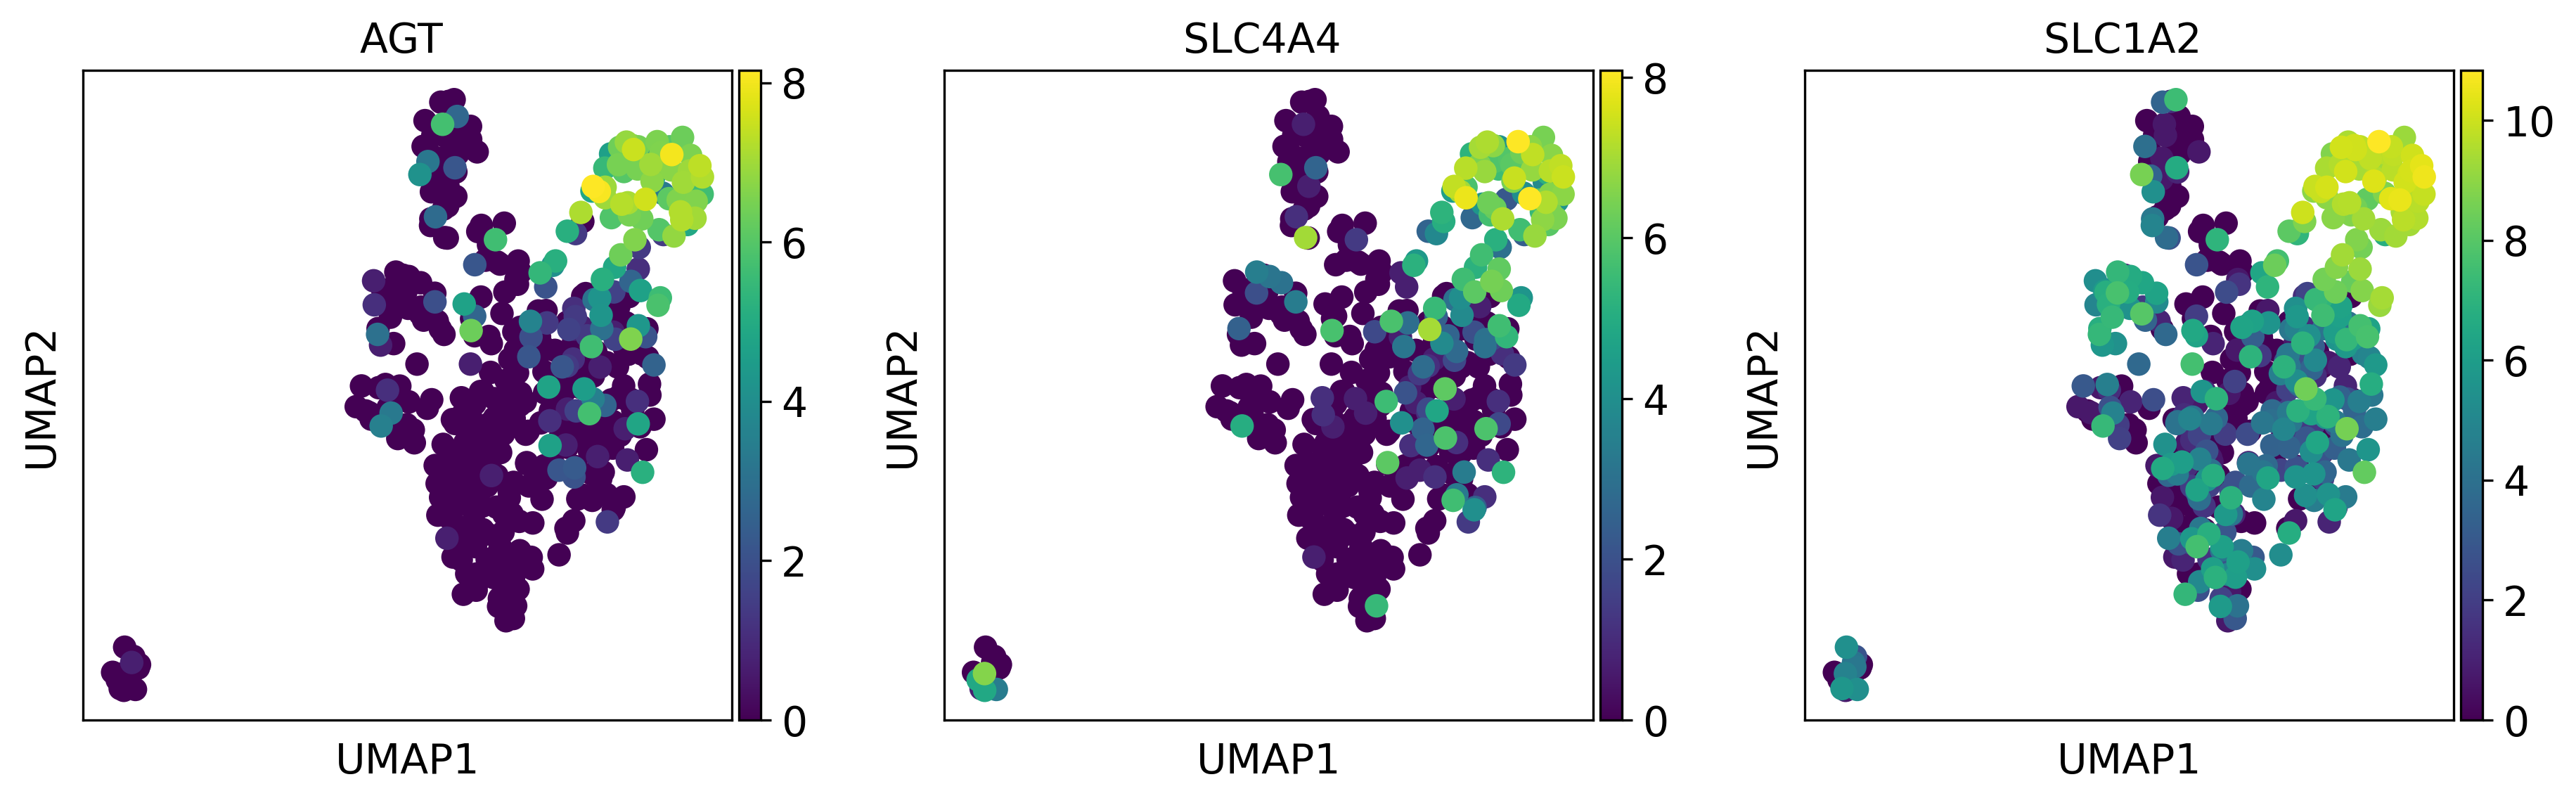

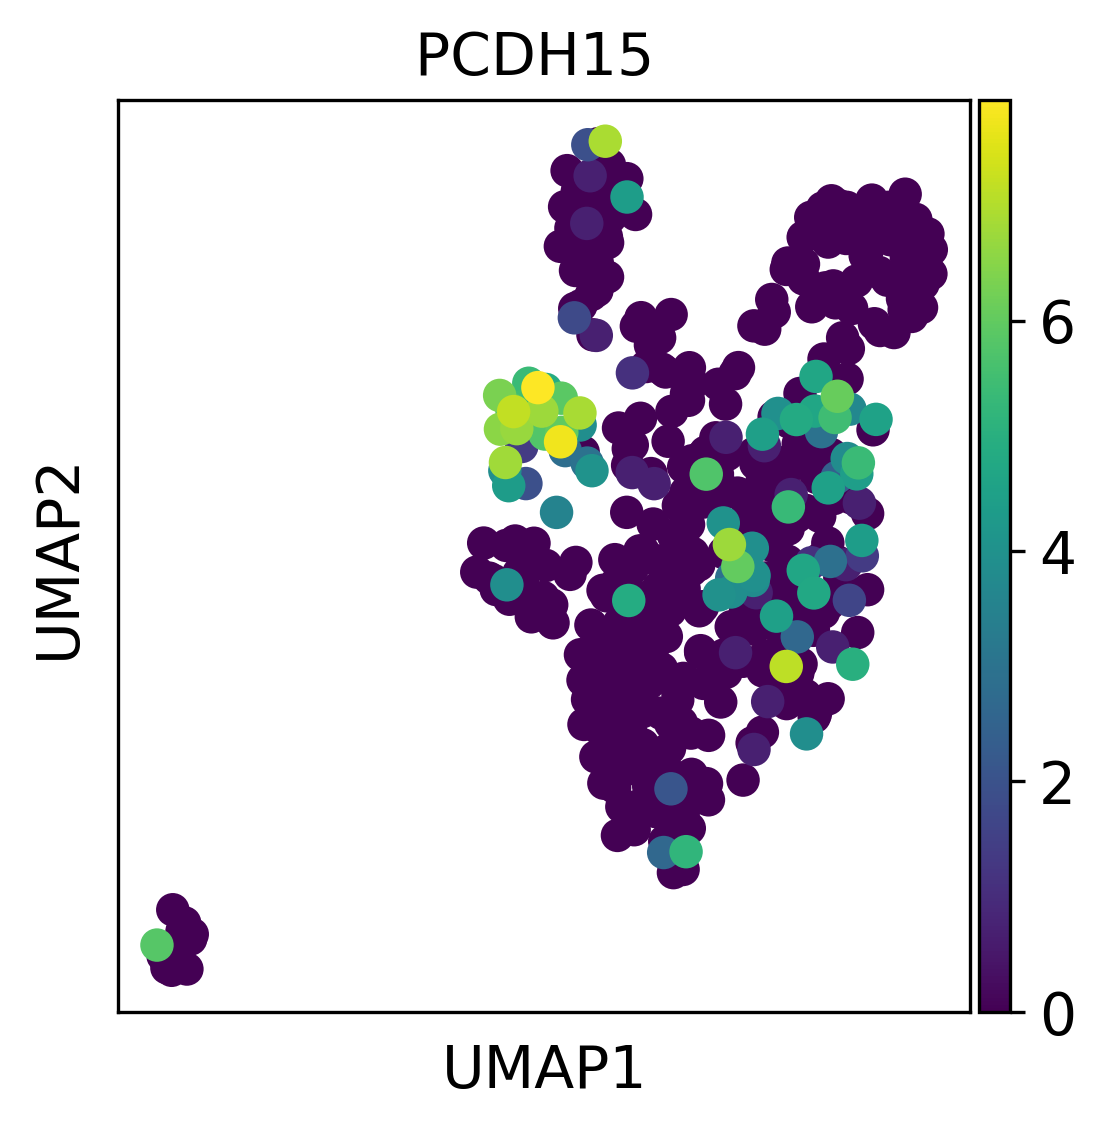

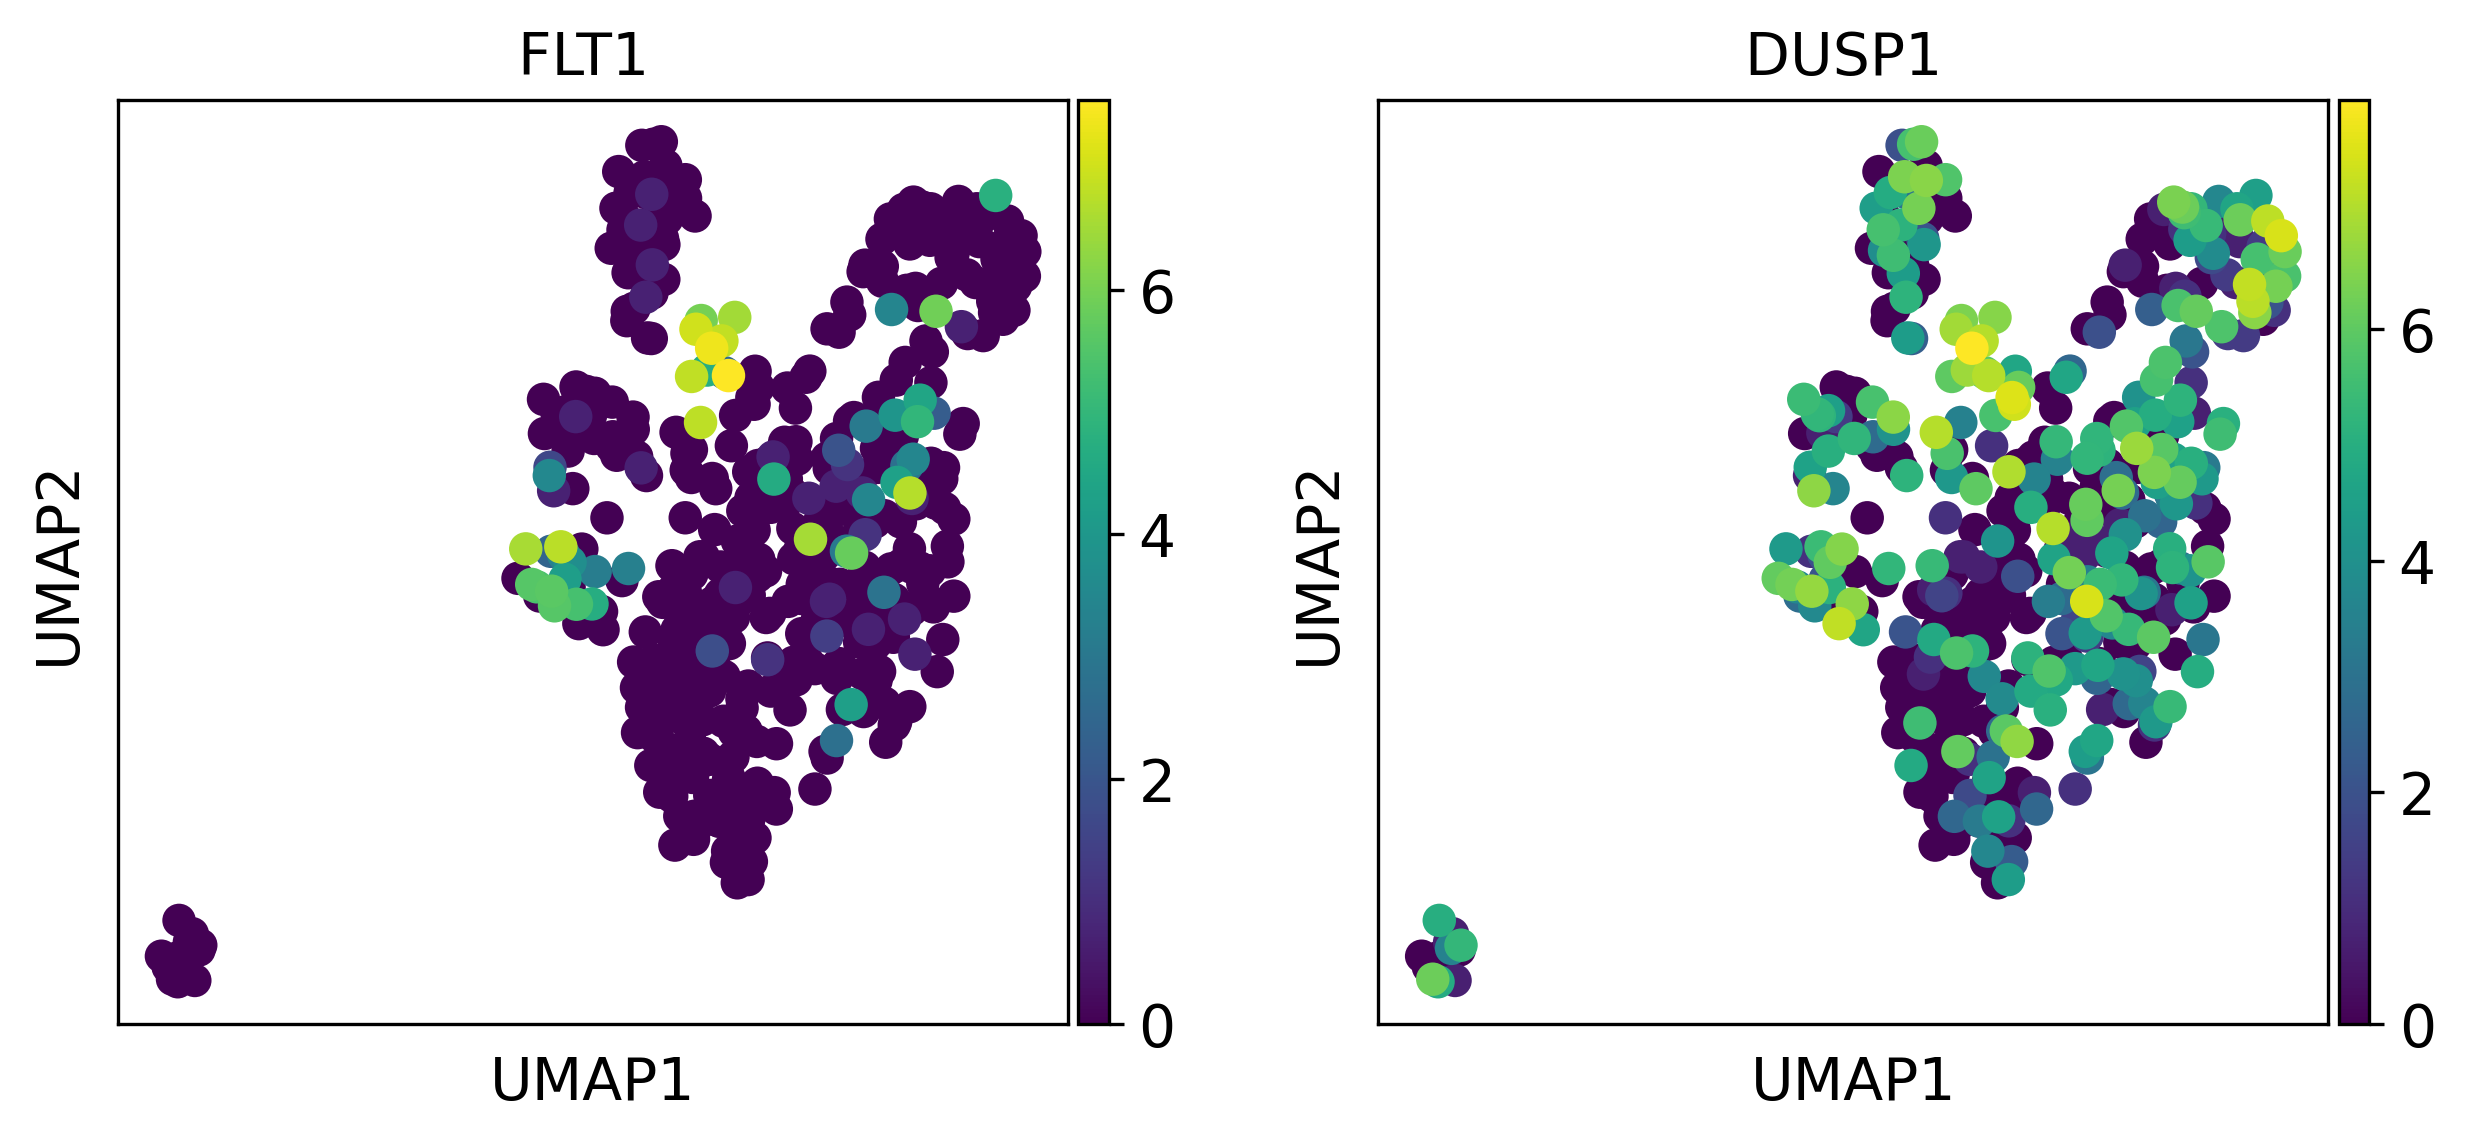

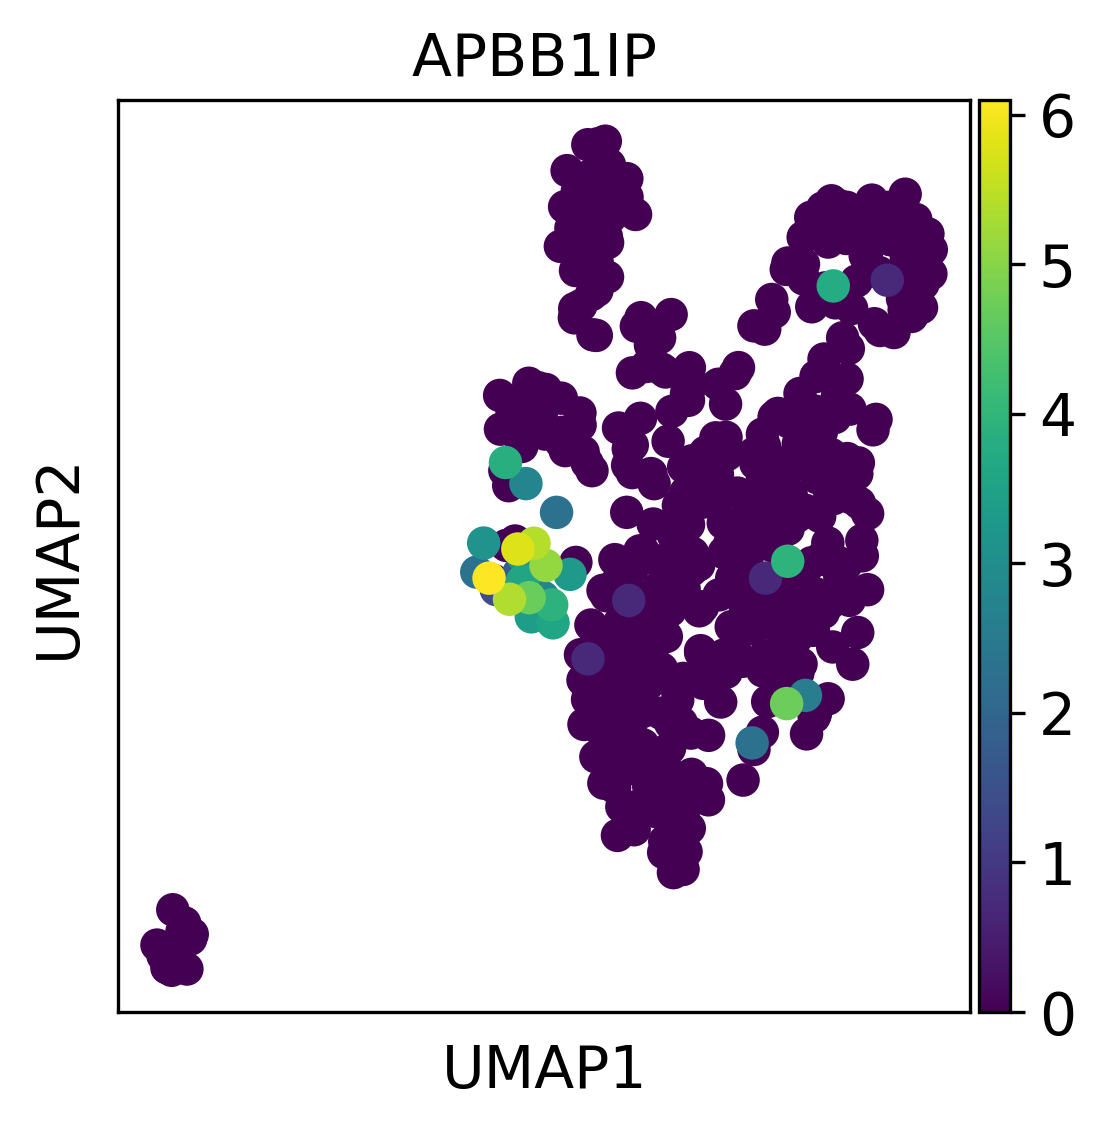

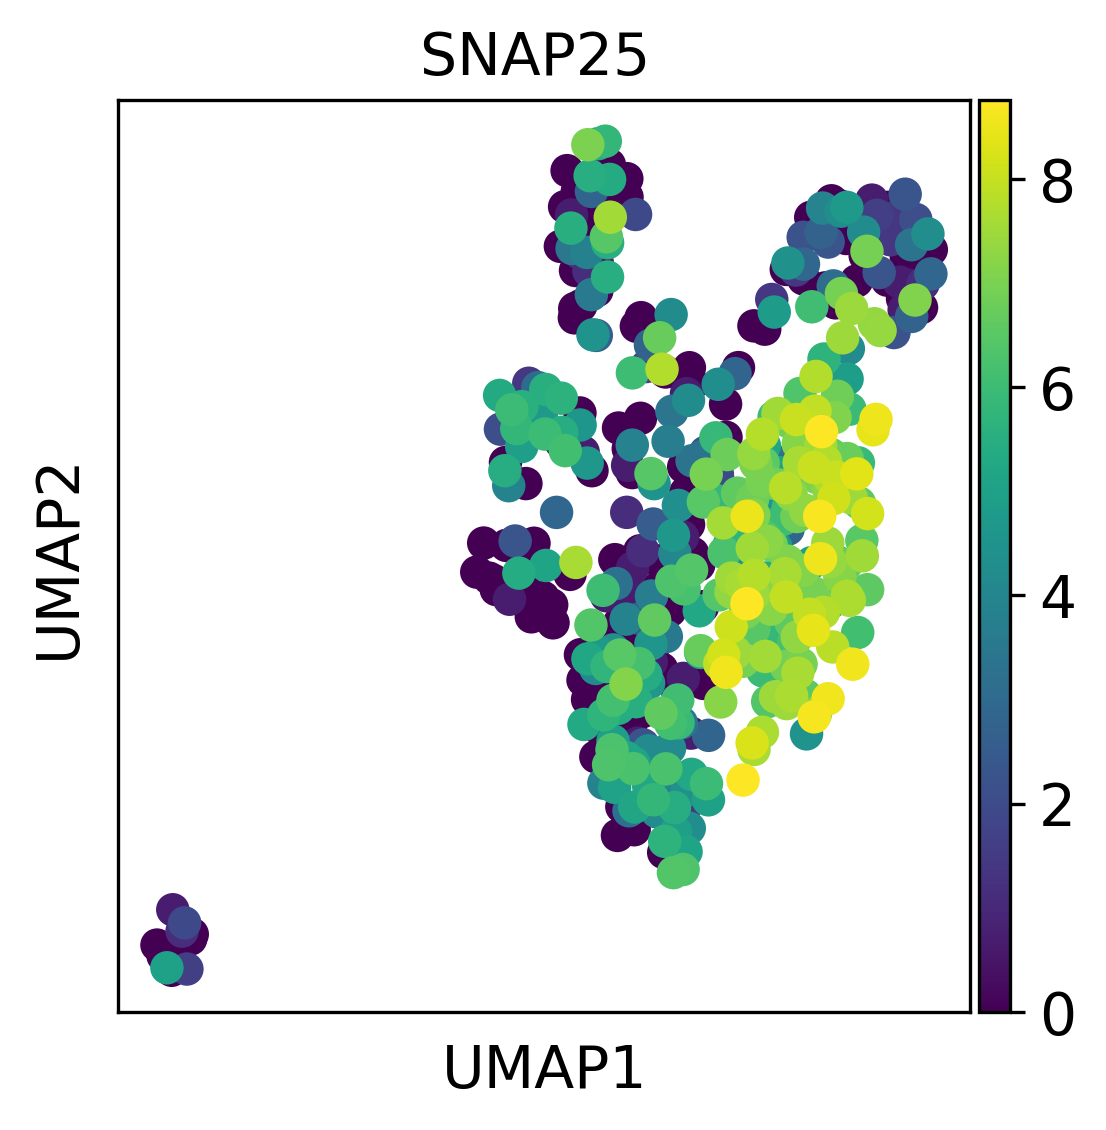

In [18]:
# Oligodendrocytes
sc.pl.umap(adata, color='MOBP ')
# Ex-Neurons
sc.pl.umap(adata, color='SLC17A7 ')
# In-Neurons
sc.pl.umap(adata, color='GAD1 ')
# Astrocytes
sc.pl.umap(adata, color=['AGT ', 'SLC4A4 ', 'SLC1A2 '])
# OPC
sc.pl.umap(adata, color='PCDH15 ')
# Endothelial
sc.pl.umap(adata, color=['FLT1 ', 'DUSP1 '])
# Microglia
sc.pl.umap(adata, color=['APBB1IP '])
# ?
sc.pl.umap(adata, color=['SNAP25 '])

/home/slee/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)
/opt/conda/envs/celsius/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


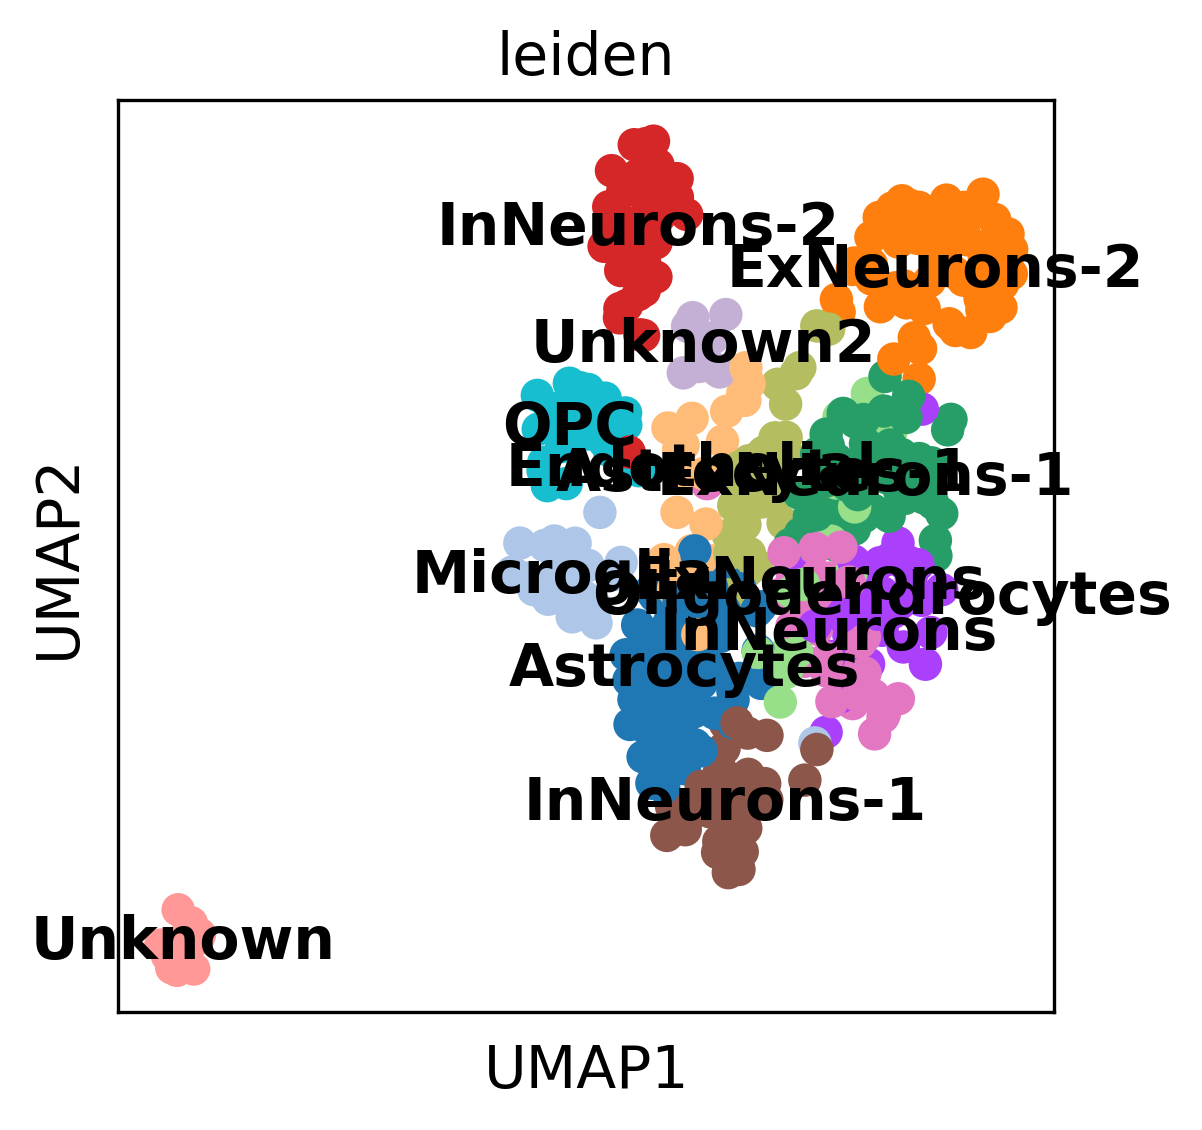

In [19]:
newcelltypes = ['Astrocytes','ExNeurons-2','ExNeurons-1','InNeurons-2','Oligodendrocytes',
                'InNeurons-1','InNeurons','Astrocytes-1','OPC','Microglia','Endothelial','ExNeurons','Unknown','Unknown2' ]
adata.rename_categories('leiden', newcelltypes)
sc.pl.umap(adata, color='leiden', legend_loc='on data')

/opt/conda/envs/celsius/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


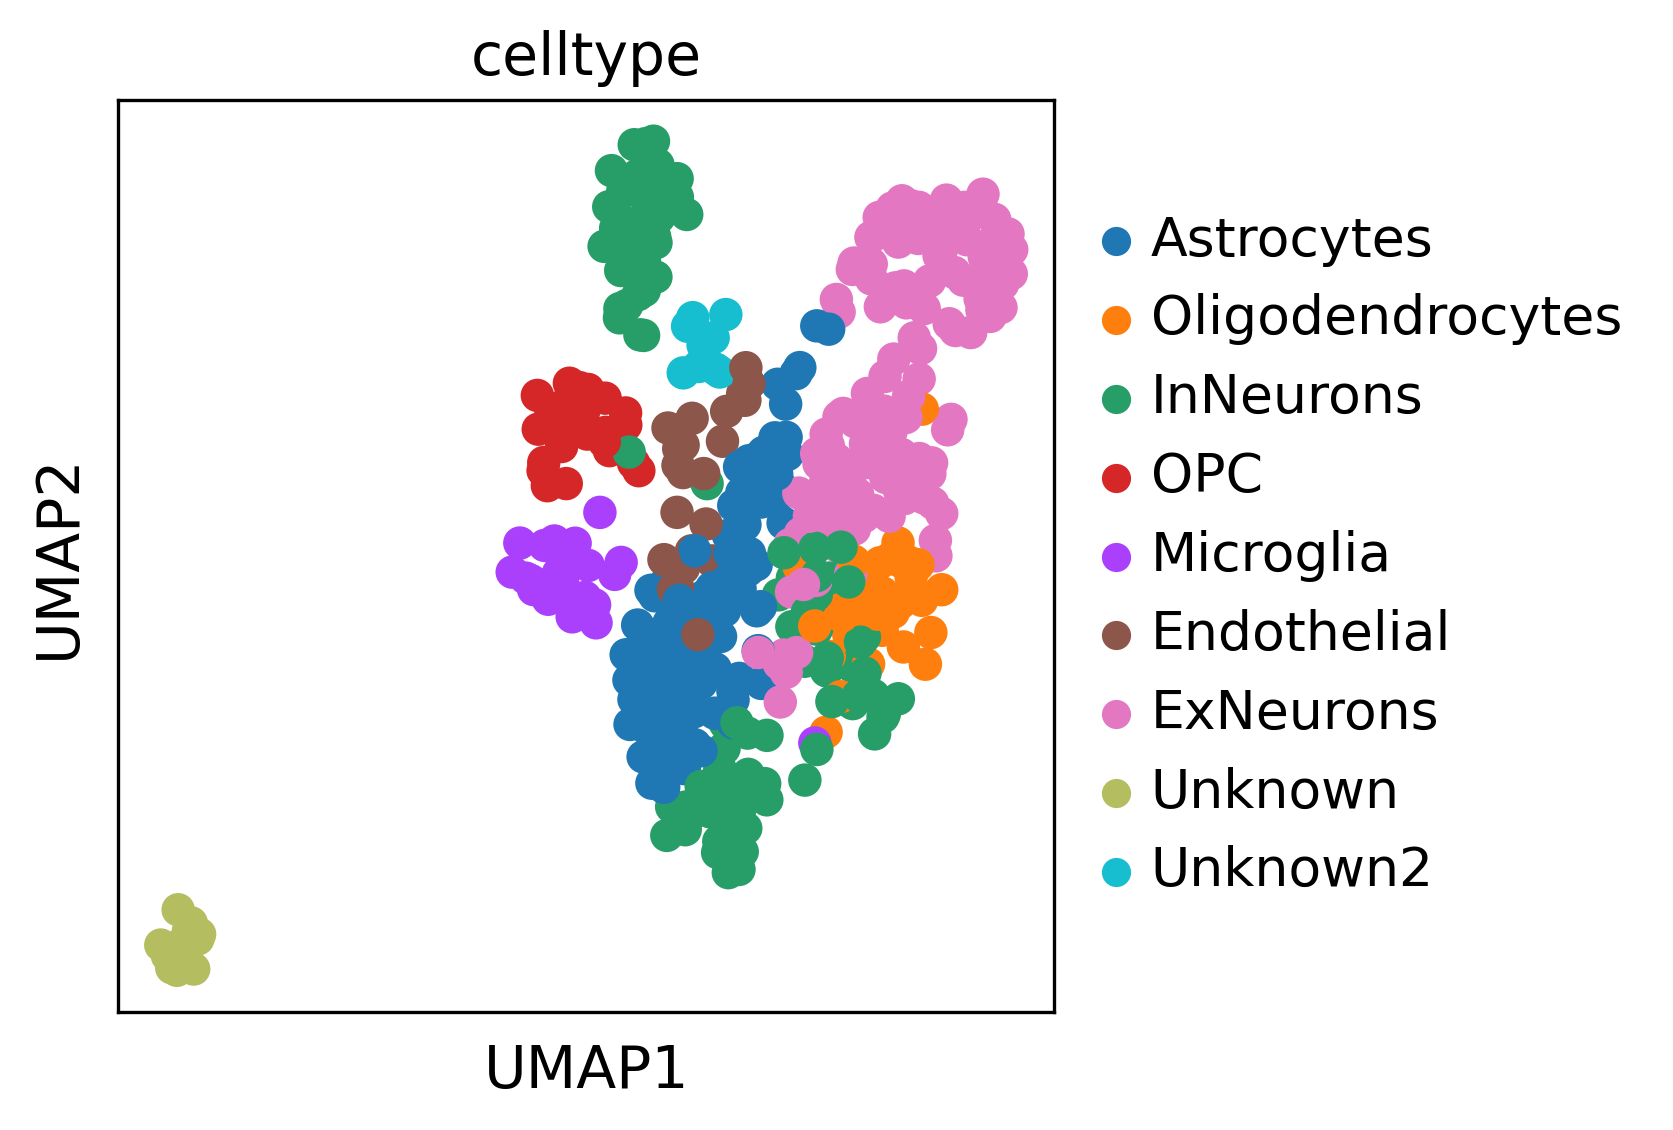

In [20]:
celltypes = pd.DataFrame(adata.obs['leiden'])
celltypes.leiden.replace(['ExNeurons-1', 'ExNeurons-2', 'InNeurons-1', 'InNeurons-2', 'Astrocytes-1'],
                         ['ExNeurons', 'ExNeurons','InNeurons', 'InNeurons', 'Astrocytes'], inplace=True)
adata.obs['celltype'] = celltypes.leiden
sc.pl.umap(adata, color='celltype')

In [21]:
celltypes = pd.DataFrame(adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv("GSE67835_celltypes.txt", sep="\t")